In [19]:
import torch
from custom_classes import Splatter, Splatter_Non_Sparse
import time
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def sparse_matrix(sparcity = .5, rows = 25, cols = 25, batches = 100):
    return  (torch.rand(size=(batches,1,rows,cols)) < sparcity).float()

In [21]:
model_normal = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3)
)

model_splatter = Splatter(3,3)

model_splatter_non_sparse = Splatter_Non_Sparse(3,3)


In [22]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,50)
splatter_single_layer_times = []
splatter_non_sparse_single_layer_times = []
normal_single_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 266, cols = 266)
    t0 = time.perf_counter()
    output = model_splatter(input)
    splatter_single_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse(input)
    splatter_non_sparse_single_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_normal(input)
    normal_single_layer_times.append(time.perf_counter()-t0)


Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time')

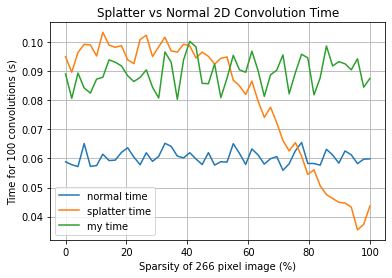

In [23]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_single_layer_times)
plt.plot((1-sparsity)*100, splatter_single_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_single_layer_times)
plt.legend(("normal time", "splatter time", "my time"))
plt.grid()
plt.xlabel("Sparsity of 266 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time")


In [24]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,100)
splatter_single_layer_times = []
splatter_non_sparse_single_layer_times = []
normal_single_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 24, cols = 24)
    t0 = time.perf_counter()
    output = model_splatter(input)
    splatter_single_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse(input)
    splatter_non_sparse_single_layer_times.append(time.perf_counter()-t0)


    t0 = time.perf_counter()
    output = model_normal(input)
    normal_single_layer_times.append(time.perf_counter()-t0)

Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time')

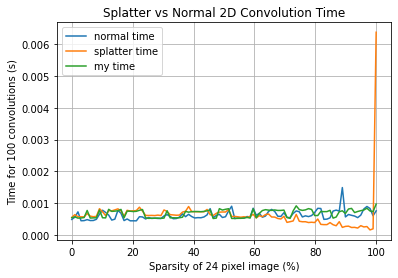

In [25]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_single_layer_times)
plt.plot((1-sparsity)*100, splatter_single_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_single_layer_times)
plt.legend(("normal time", "splatter time", "my time"))
plt.grid()
plt.xlabel("Sparsity of 24 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time")

In [26]:
model_normal_4_layer = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3)
)

model_splatter_4_layer = torch.nn.Sequential(

    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3)
)

model_splatter_non_sparse_4_layer = torch.nn.Sequential(
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3)
)



In [27]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,50)
splatter_4_layer_times = []
normal_4_layer_times = []
splatter_non_sparse_4_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 266, cols = 266)
    t0 = time.perf_counter()
    output = model_splatter_4_layer(input)
    splatter_4_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse_4_layer(input)
    splatter_non_sparse_4_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_normal_4_layer(input)
    normal_4_layer_times.append(time.perf_counter()-t0)

Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time 4 Layers')

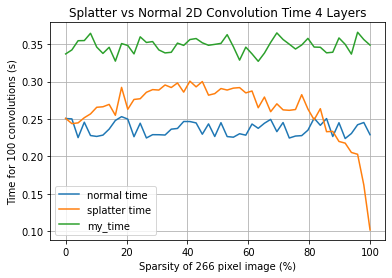

In [28]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_4_layer_times)
plt.plot((1-sparsity)*100, splatter_4_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_4_layer_times)

plt.legend(("normal time", "splatter time", "my_time"))
plt.grid()
plt.xlabel("Sparsity of 266 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time 4 Layers")


In [29]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,50)
splatter_4_layer_times = []
normal_4_layer_times = []
splatter_non_sparse_4_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 24, cols = 24)
    t0 = time.perf_counter()
    output = model_splatter_4_layer(input)
    splatter_4_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse_4_layer(input)
    splatter_non_sparse_4_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_normal_4_layer(input)
    normal_4_layer_times.append(time.perf_counter()-t0)

Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time 4 Layers')

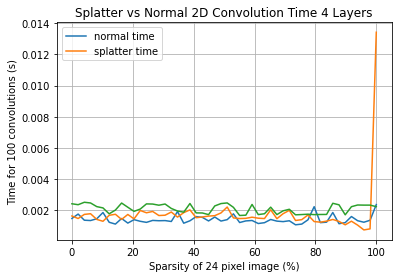

In [30]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_4_layer_times)
plt.plot((1-sparsity)*100, splatter_4_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_4_layer_times)

plt.legend(("normal time", "splatter time", "my time"))
plt.grid()
plt.xlabel("Sparsity of 24 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time 4 Layers")


In [31]:
model_normal_8_layer = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3)
)

model_splatter_8_layer = torch.nn.Sequential(

    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3),
    Splatter(3,3)
)

model_splatter_non_sparse_8_layer = torch.nn.Sequential(
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3),
    Splatter_Non_Sparse(3,3)
)

In [38]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,50)
splatter_8_layer_times = []
normal_8_layer_times = []
splatter_non_sparse_8_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 266, cols = 266)
    t0 = time.perf_counter()
    output = model_splatter_8_layer(input)
    splatter_8_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse_8_layer(input)
    splatter_non_sparse_8_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_normal_8_layer(input)
    normal_8_layer_times.append(time.perf_counter()-t0)

Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time 8 Layers')

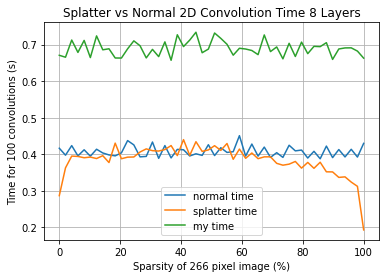

In [39]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_8_layer_times)
plt.plot((1-sparsity)*100, splatter_8_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_8_layer_times)

plt.legend(("normal time", "splatter time", "my time"))
plt.grid()
plt.xlabel("Sparsity of 266 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time 8 Layers")

In [34]:
torch.manual_seed(42)
sparsity = np.linspace(0,1,50)
splatter_8_layer_times = []
normal_8_layer_times = []
splatter_non_sparse_8_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 24, cols = 24)
    t0 = time.perf_counter()
    output = model_splatter_8_layer(input)
    splatter_8_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_splatter_non_sparse_8_layer(input)
    splatter_non_sparse_8_layer_times.append(time.perf_counter()-t0)

    t0 = time.perf_counter()
    output = model_normal_8_layer(input)
    normal_8_layer_times.append(time.perf_counter()-t0)

Text(0.5, 1.0, 'Splatter vs Normal 2D Convolution Time 8 Layers')

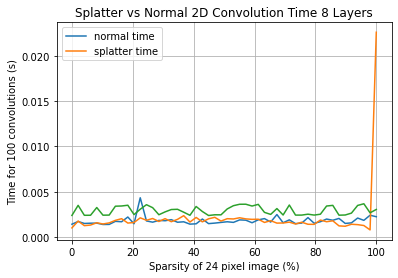

In [37]:
plt.subplot()
plt.plot((1-sparsity)*100, normal_8_layer_times)
plt.plot((1-sparsity)*100, splatter_8_layer_times)
plt.plot((1-sparsity)*100, splatter_non_sparse_8_layer_times)

plt.legend(("normal time", "splatter time"))
plt.grid()
plt.xlabel("Sparsity of 24 pixel image (%)")
plt.ylabel("Time for 100 convolutions (s)")
plt.title("Splatter vs Normal 2D Convolution Time 8 Layers")